In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 12 12:44:59 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distirbuted solution with agent failure probability $p$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
fail_probability = [0, 0.05, 0.1]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=2166.1245567974815, L=-20000.0, U=-9.22881886842511


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=1, rel_gap=8.750191794208584, L=-89.98275400115585, U=-9.22881886842511
k=2, rel_gap=6.076052752132513, L=-89.48665552998078, U=-12.646408762711971
k=3, rel_gap=1.0345432282485065, L=-89.01039393919032, U=-43.7495712567471
k=4, rel_gap=0.574953605637942, L=-89.01039393919464, U=-56.51620061731316
k=5, rel_gap=0.3292238010773409, L=-89.01039393919852, U=-66.96418907565096
k=6, rel_gap=0.20867784469137557, L=-89.01039393919848, U=-73.64277779239549
k=7, rel_gap=0.1412465611023348, L=-89.01039393920121, U=-77.99400845793191
k=8, rel_gap=0.10078587610585357, L=-89.01039393920604, U=-80.8607703562565
k=9, rel_gap=0.07062486907598603, L=-89.01039393920223, U=-83.13873188470167
k=10, rel_gap=0.050375669270728785, L=-89.00794971068846, U=-84.7391579171729
k=11, rel_gap=0.037267438068102135, L=-89.00682545917013, U=-85.80894588279398
k=12, rel_gap=0.022711336998103952, L=-89.00507983657384, U=-87.02854521768037
k=13, rel_gap=0.015576764925641392, L=-89.00372630075577, U=-87.63860042354598
k=1

k=6, rel_gap=0.5749553165066605, L=-89.01039393919683, U=-56.516139223953914
k=7, rel_gap=0.5749553165066656, L=-89.01039393919712, U=-56.516139223953914
k=8, rel_gap=0.25892511331504864, L=-89.01039394101869, U=-70.70348585439939
k=9, rel_gap=0.15370327264472866, L=-89.01039393924134, U=-77.15189516208575
k=10, rel_gap=0.1537032726442877, L=-89.01039393920732, U=-77.15189516208575
k=11, rel_gap=0.15370327264441425, L=-89.01039393921708, U=-77.15189516208575
k=12, rel_gap=0.08465739668078202, L=-89.01039393920203, U=-82.06314197606312
k=13, rel_gap=0.084657396680972, L=-89.01039393921762, U=-82.06314197606312
k=14, rel_gap=0.08465739668080247, L=-89.01039393920371, U=-82.06314197606312
k=15, rel_gap=0.08465739668082428, L=-89.0103939392055, U=-82.06314197606312
k=16, rel_gap=0.08465739668099347, L=-89.01039393921938, U=-82.06314197606312
k=17, rel_gap=0.08465739668081666, L=-89.01039393920487, U=-82.06314197606312
k=18, rel_gap=0.084642401446995, L=-89.0091633832028, U=-82.063141976063

# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

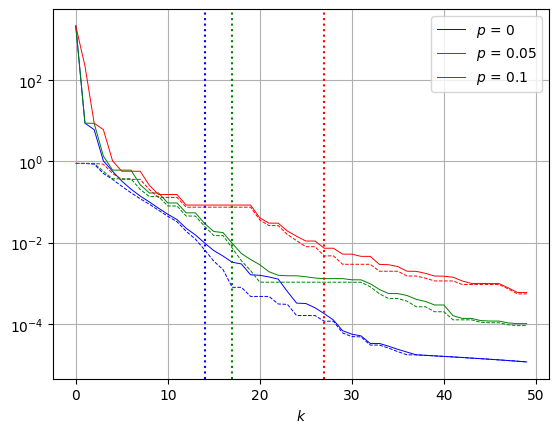

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)